# Shared Bikes Demand Prediction using Multiple Linear Regression

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands 

### Data Understanding & preparation

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Loading the dataset into a pandas dataframe
bike_df = pd.read_csv("day.csv")

In [3]:
# Check the shape of the dataframe
bike_df.shape

(730, 16)

In [4]:
# Check the column data types and if there are any null values in the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Check overall statistics of all columns
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Understand available features in dataset
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Replacing numerical values with string values for categorical variables

In [7]:
# Numerical values for these categorical variables could indicate some order within them, which is not the case
# These numerical values are replaced by the string values present in Readme.txt

bike_df.season.replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"}, inplace=True)

# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

# Since the above category names for the vraible `weathersit` are very long, they are replaced with shorter ones 

bike_df.weathersit.replace({1: "clear", 2: "misty", 3:"light_snow", 4:"rain"}, inplace=True)

bike_df.mnth.replace({
    1: "jan", 2: "feb", 3: "mar", 4:"apr", 5:"may", 
    6:"june", 7:"july", 8: "aug", 9:"sep", 10:"oct",
    11: "nov", 12: "dec"}, inplace=True)

bike_df.weekday.replace({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}, inplace=True)


In [8]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,Mon,0,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,Tues,0,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Remove unnecessary variables

In [9]:
# The `variable` instant is just an index
# The variables `casual` and `registered` are added up to form the `cnt` variable and hence are not individually required
# The variable `dteday` is split into the variables `mnth`, `yr` and `weekday` and hence can be removed

bike_df.drop(["instant", "casual", "registered", "dteday"], axis=1, inplace=True)

### Exploratory data analysis

In [10]:
bike_df.yr = bike_df.yr.astype("category")
bike_df.holiday = bike_df.holiday.astype("category")
bike_df.workingday = bike_df.workingday.astype("category")
categorical_df = bike_df.select_dtypes(["object", "category"])
numerical_df = bike_df.select_dtypes(exclude=["object", "category"])

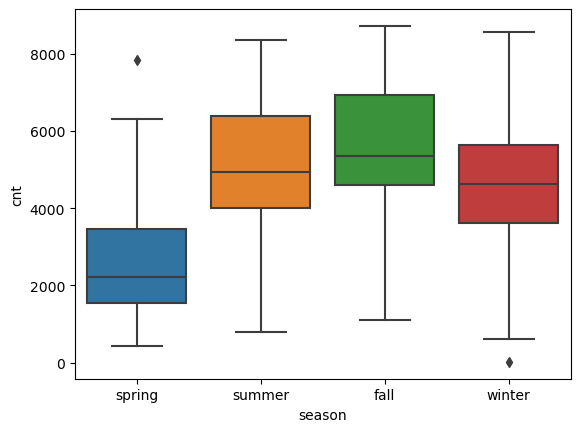

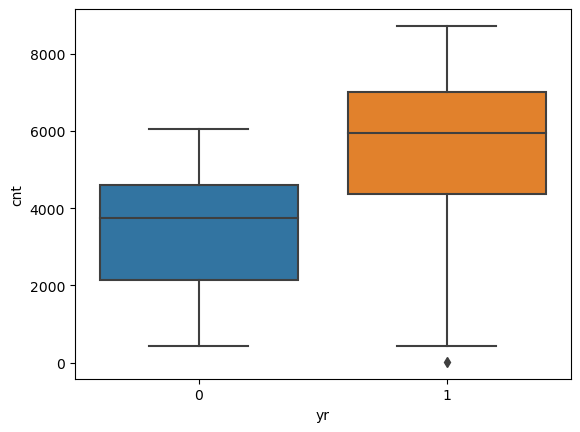

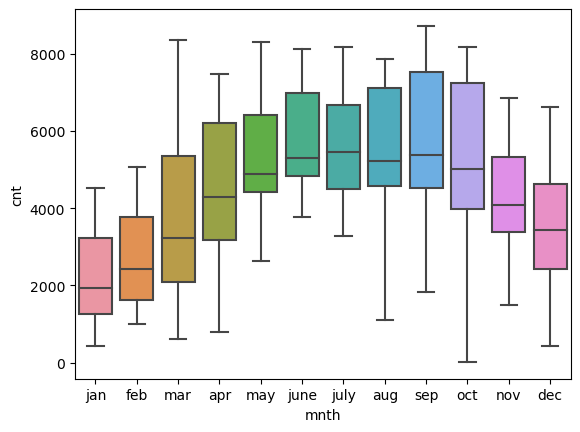

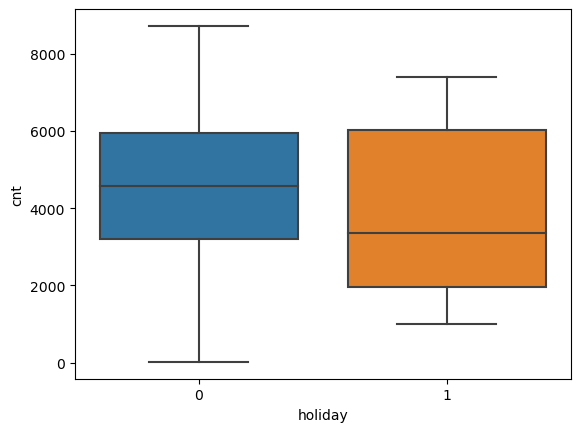

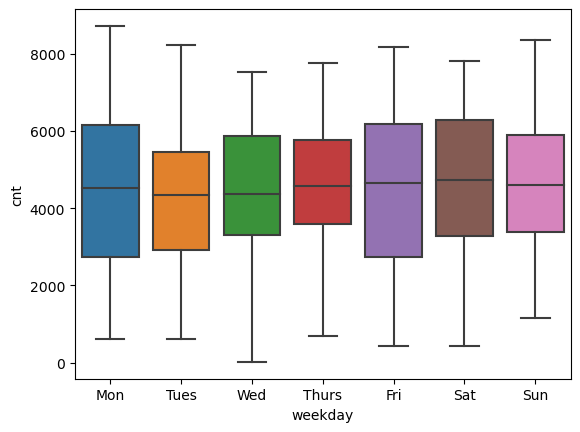

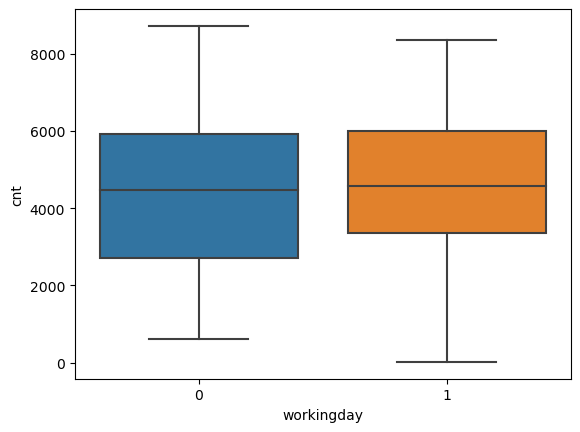

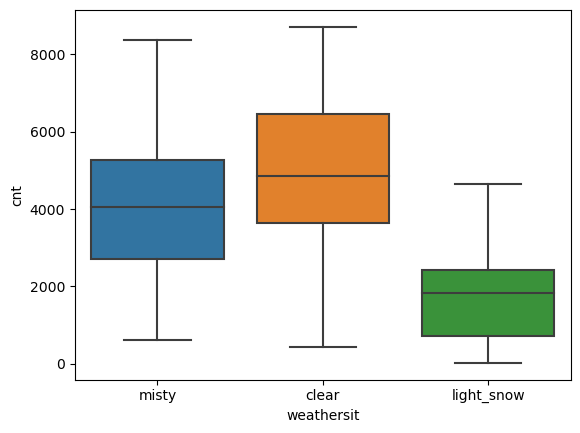

In [11]:
for col in categorical_df.columns:
    plt.figure()
    sns.boxplot(x=col, y="cnt", data=bike_df)
    plt.show()

From the plots above, it can be seen that the variables `weathersit`, `yr`, `season`, `mnth` and `holiday` have an impact on the demand of bikes

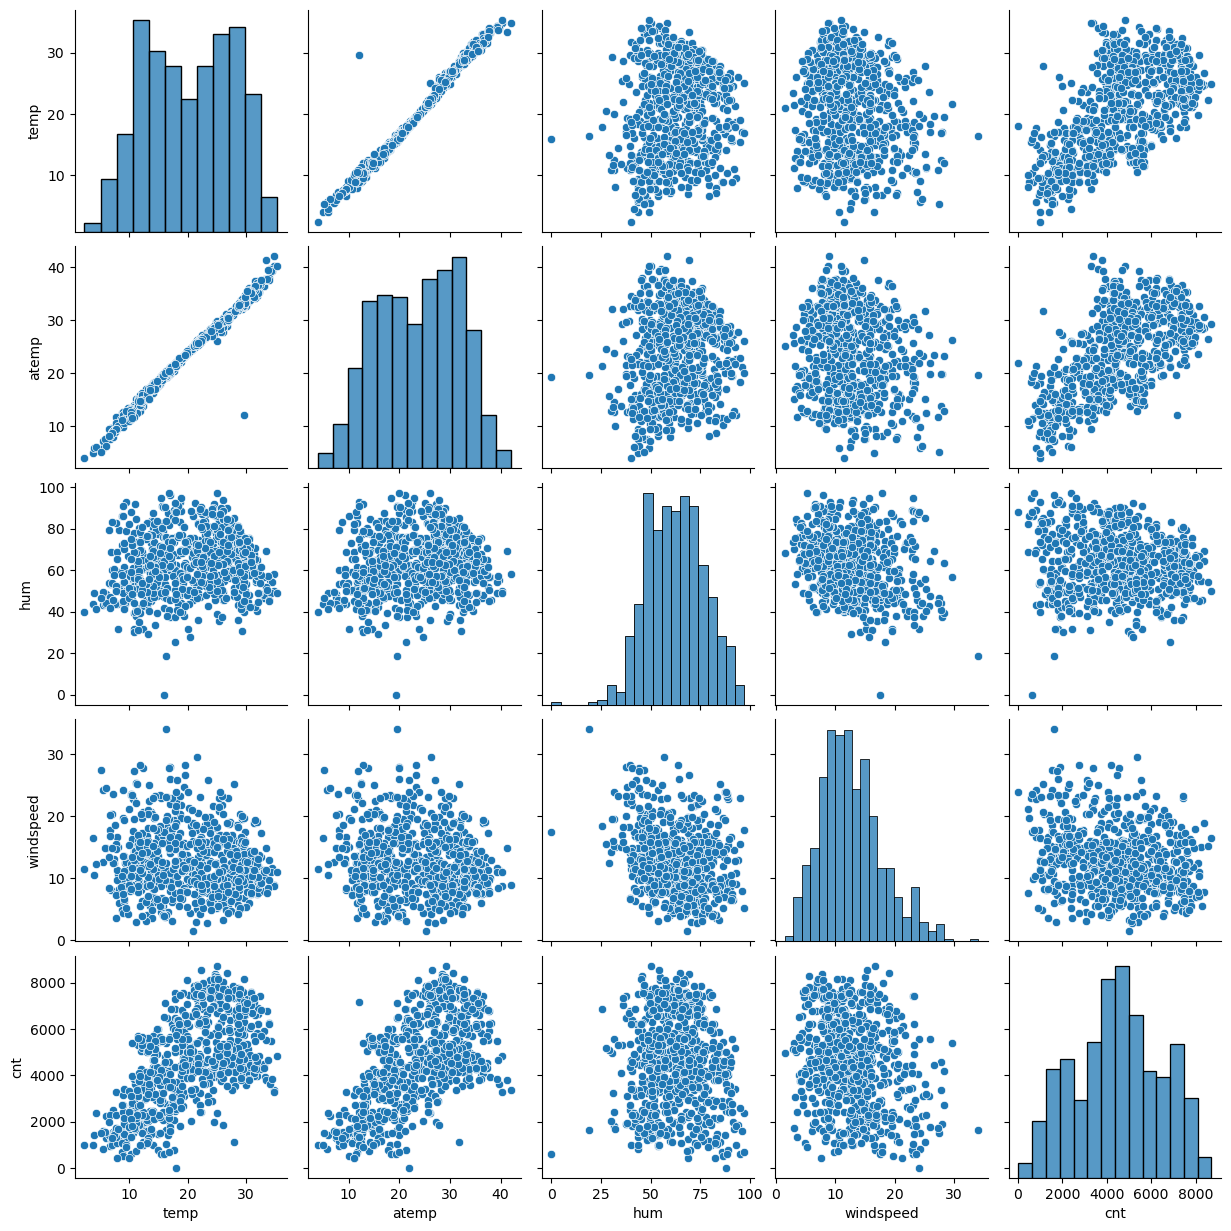

In [12]:
sns.pairplot(numerical_df)
plt.show()

According to the plots above, the variables `temp` and `atemp` are highly correlated. Also, these variables have a strong association with the target variable `cnt`

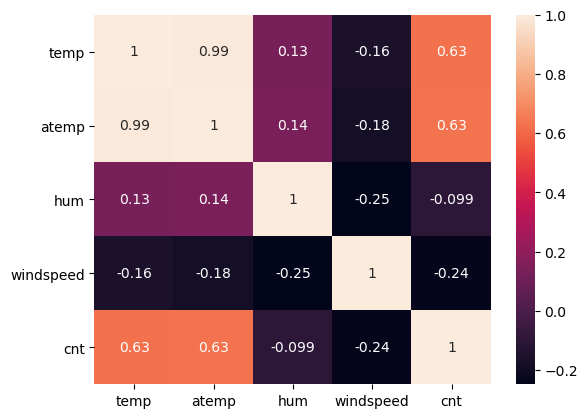

In [13]:
sns.heatmap(bike_df.corr(), annot=True)
plt.show()

'temp' and 'atemp' variables have an almost perfect positive correlation. Hence, it is decided to drop the "atemp" variable.

In [14]:
bike_df.drop("atemp", axis=1, inplace=True)

### Data preparation for modelling

#### Creating dummy variables

In [15]:
dummy_df = pd.get_dummies(bike_df.select_dtypes("object"), drop_first=True)
feature_df = pd.concat([bike_df.drop(bike_df.select_dtypes("object"), axis=1), dummy_df], axis=1)

#### Splitting the dataset into train & test sets

In [16]:
np.random.seed(0)
df_train, df_test = train_test_split(feature_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the numeric features

In [17]:
scaler = MinMaxScaler()
num_vars = ["temp", "hum", "windspeed", "cnt"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<ipython-input-17-12b739d9696a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
c:\Users\AshitaAhuja\anaconda3\envs\gui_apnea_annotation\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [18]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_light_snow,weathersit_misty
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1


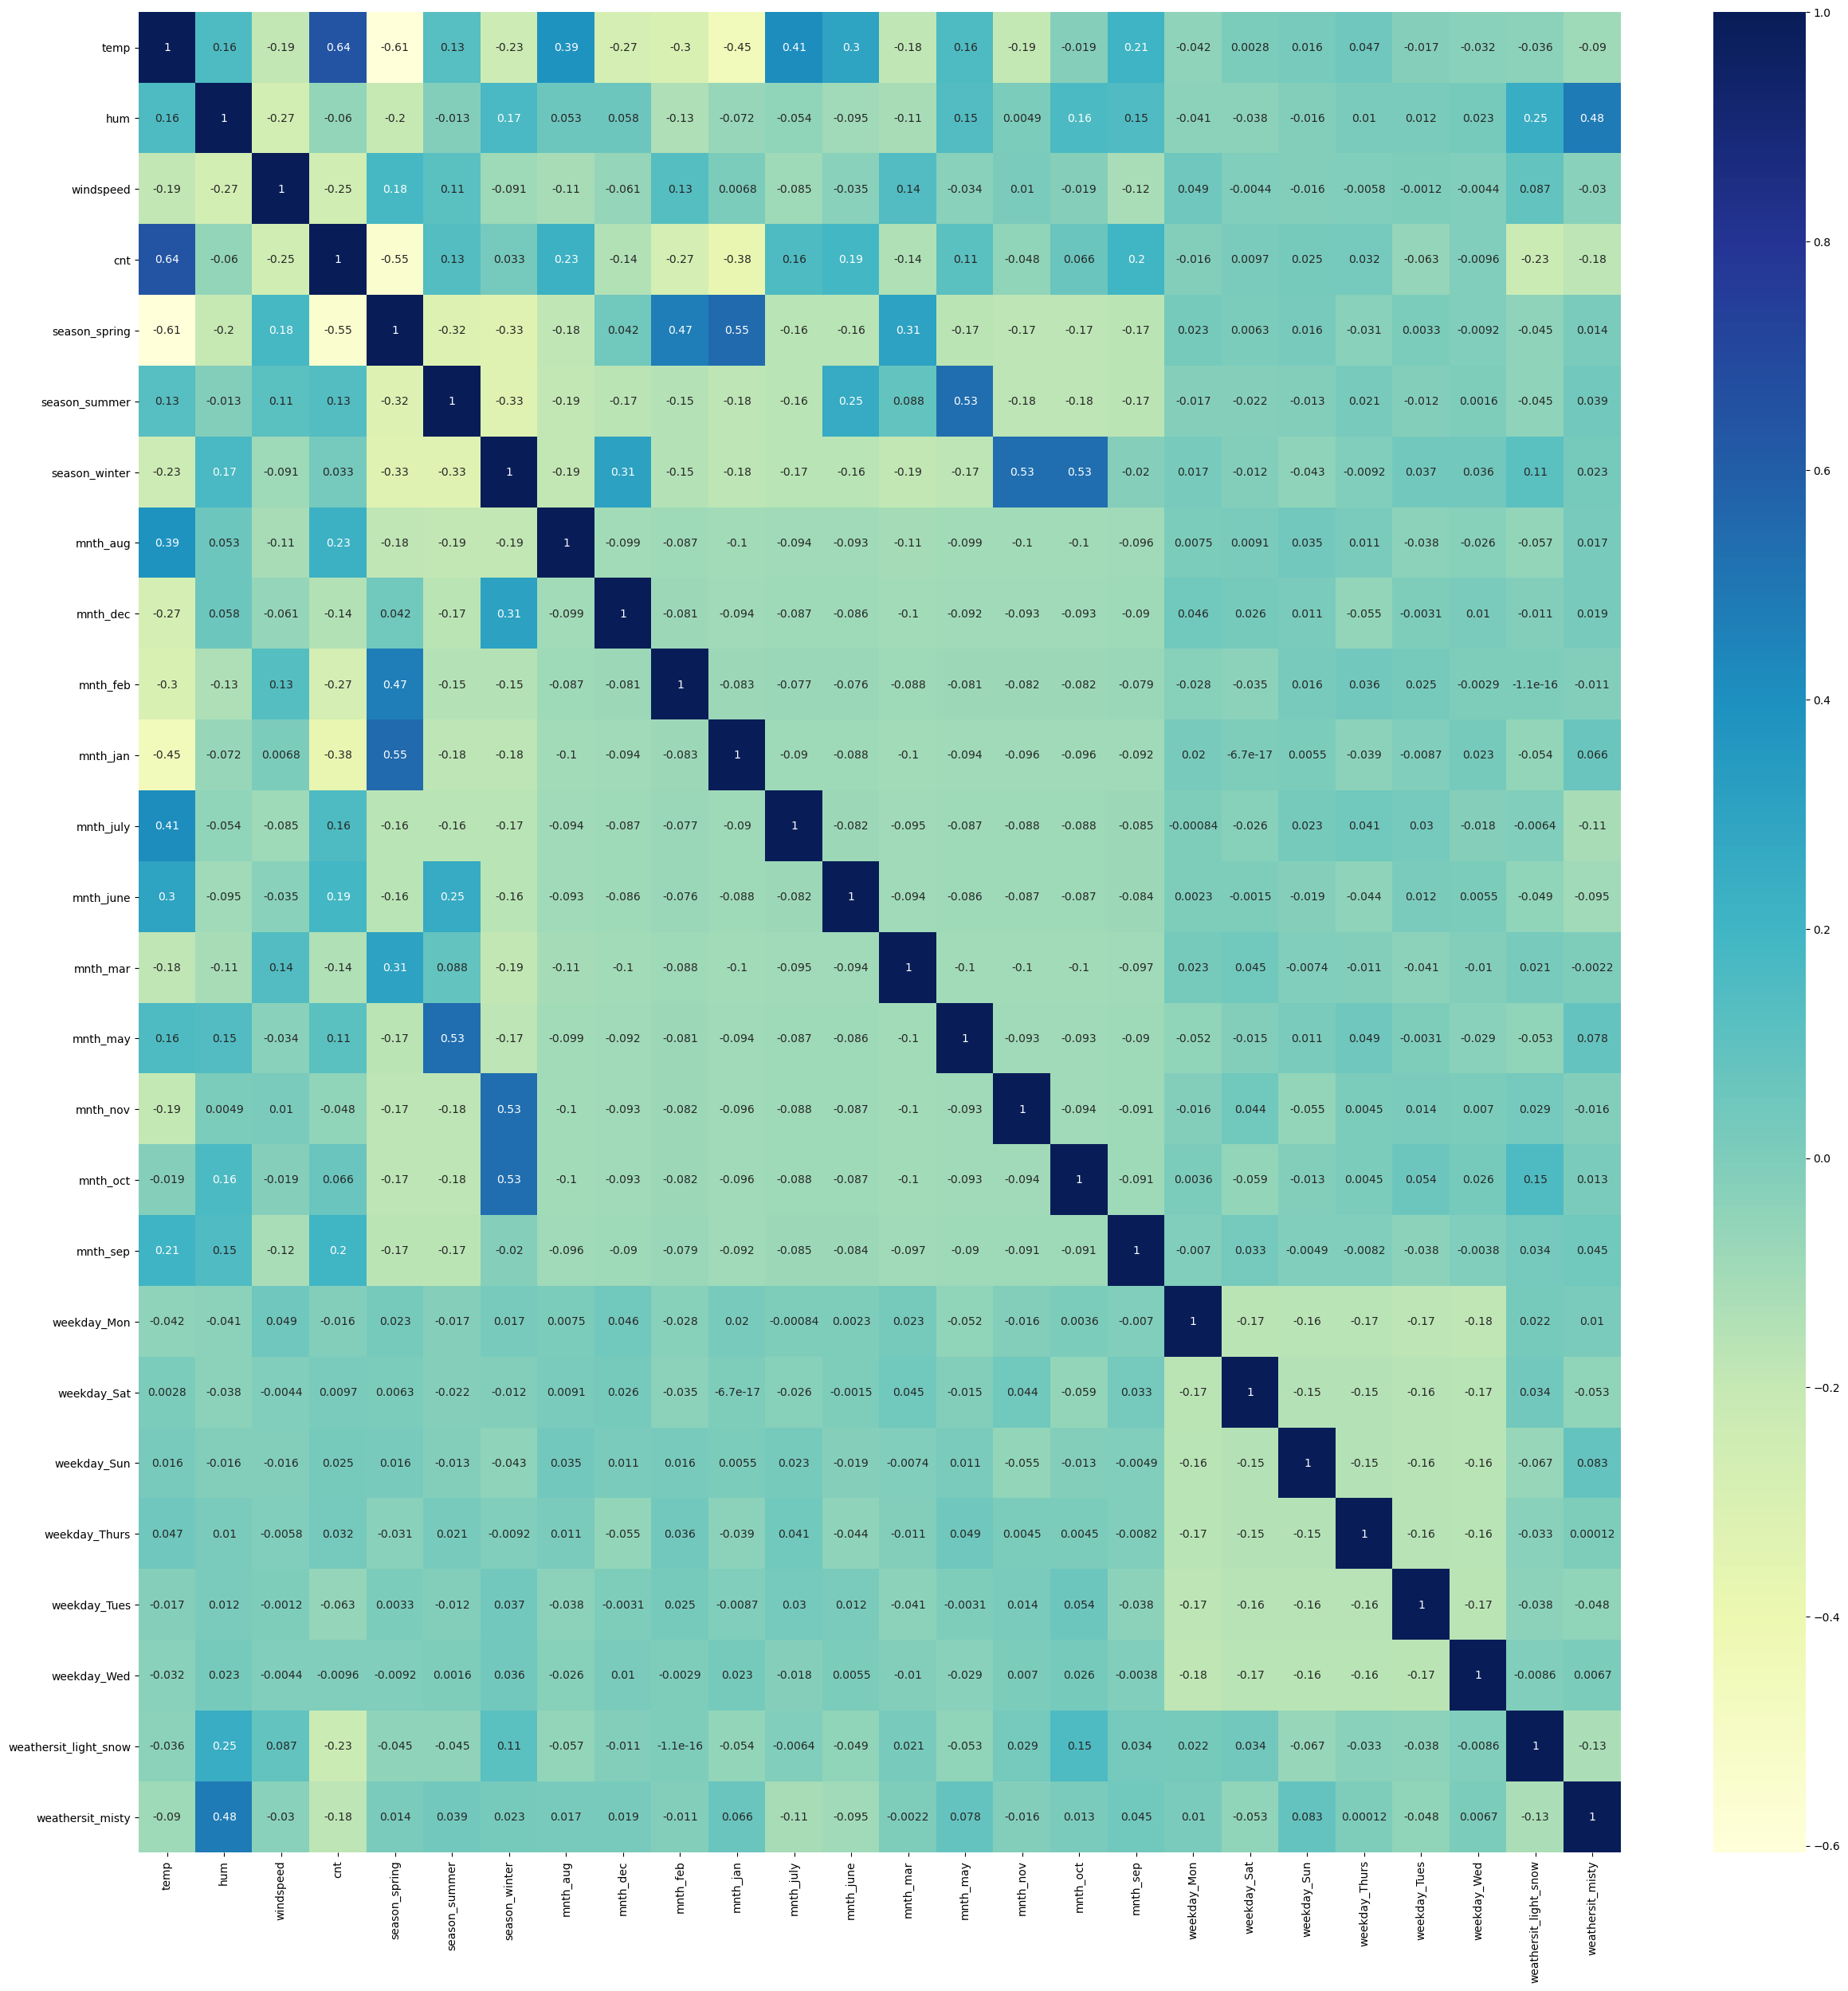

In [19]:
# Inspecting correlation coefficients of variables in the train set
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the correlation plot above, `tmp` and `season_spring` seem to have a strong association with the target variable

### Model Building & Evaluation

In [20]:
y_train = df_train.pop("cnt")
X_train = df_train

In [21]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          8.74e-182
Time:                        17:02:06   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2429      0.035      6.854      0.000       0.173       0.313
yr                        0.2321      0.008     28.820      0.000       0.216       0.248
holiday                   0.0067      0.024      0.278      0.781      -0.041       0.054
workingday                0.0937      0.012      7.783      0.000       0.070       0.117
temp                      0.4506      0.046      9.734      0.000       0.360       0.542
hum                      -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed                -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring            -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer             0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter             0.1058      0.028      3.794      0.000       0.051       0.161
mnth_aug                  0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_dec                 -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_feb                 -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_jan                 -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_july                -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_june                -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_mar                  0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_may                  0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_nov                 -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_oct                  0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_sep                  0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon               0.0985      0.013      7.300      0.000       0.072       0.125
weekday_Sat              -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun               0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thurs            -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tues              0.0440      0.014      3.213      0.001       0.017       0.071
weekday_Wed              -0.0155      0.015     -1.064      0.288      -0.044       0.013
weathersit_light_snow    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
weathersit_misty         -0.0611      0.010     -5.854      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarqu

The first model built has an Adjusted R-squared value of 84.5% but as we saw above, there are several features that are correlated with each other (multicollinearity) and also features that do not have much predictive power when it comes to explaining the target variable. Thus, we will first use recursive feature elimination to select the m10 most important features and then proceed with a mnual feature elimination using p-values and Variance Inflation Factors.

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [23]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_aug', False, 12),
 ('mnth_dec', False, 8),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 6),
 ('mnth_july', True, 1),
 ('mnth_june', False, 18),
 ('mnth_mar', False, 19),
 ('mnth_may', False, 10),
 ('mnth_nov', False, 7),
 ('mnth_oct', False, 15),
 ('mnth_sep', True, 1),
 ('weekday_Mon', False, 4),
 ('weekday_Sat', False, 17),
 ('weekday_Sun', False, 16),
 ('weekday_Thurs', False, 14),
 ('weekday_Tues', False, 11),
 ('weekday_Wed', False, 13),
 ('weathersit_light_snow', True, 1),
 ('weathersit_misty', False, 2)]

In [24]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_july', 'mnth_sep', 'weathersit_light_snow'],
      dtype='object')

In [25]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed', 'weathersit_misty'],
      dtype='object')

In [26]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.53e-184
Time:                        17:02:07   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3769      0.031     12.133      0.000       0.316       0.438
yr                        0.2281      0.008     27.102      0.000       0.212       0.245
holiday                  -0.0920      0.026     -3.472      0.001      -0.144      -0.040
temp                      0.5147      0.031     16.542      0.000       0.454       0.576
hum                      -0.2728      0.032     -8.542      0.000      -0.336      -0.210
windspeed                -0.1887      0.026     -7.194      0.000      -0.240      -0.137
season_spring            -0.1005      0.015     -6.536      0.000      -0.131      -0.070
season_winter             0.0653      0.013      5.153      0.000       0.040       0.090
mnth_july                -0.0805      0.018     -4.538      0.000      -0.115      -0.046
mnth_sep                  0.0598      0.016      3.723      0.000       0.028       0.091
weathersit_light_snow    -0.1980      0.026     -7.659      0.000      -0.249      -0.147
==============================================================================
Omnibus:                       51.023   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.492
Skew:                          -0.593   Prob(JB):                     1.51e-22
Kurtosis:                       4.823   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Reducing the number of features from a total of 28 to 10 caused the Adjusted R-squared value to reduce from 84.5% to 82.6%. Moreover, all the variables are now significant with p-value < 0.05. This is a good sign as we have been able to simplify our model without compromising too much on its performance. Next, we'll check for multicollinearity within the automatically-selected features using VIF values.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_train_new = X_train_lm.drop(['const'], axis=1)
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,season_spring,2.40
0,yr,2.06
6,season_winter,1.98
7,mnth_july,1.40
8,mnth_sep,1.20
9,weathersit_light_snow,1.11
1,holiday,1.04


It can be observed that the vairable `hum` has the maximum VIF and is > 5. We'll first drop this variable and re-assess the changes in model performance and VIFs of remaining variables

In [28]:
X_train_new = X_train_lm.drop(["hum"], axis = 1)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_new).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          5.33e-171
Time:                        17:02:07   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2042      0.025      8.095      0.000       0.155       0.254
yr                        0.2350      0.009     26.233      0.000       0.217       0.253
holiday                  -0.0862      0.028     -3.041      0.002      -0.142      -0.030
temp                      0.4758      0.033     14.453      0.000       0.411       0.540
windspeed                -0.1325      0.027     -4.879      0.000      -0.186      -0.079
season_spring            -0.1032      0.016     -6.274      0.000      -0.136      -0.071
season_winter             0.0504      0.013      3.754      0.000       0.024       0.077
mnth_july                -0.0616      0.019     -3.272      0.001      -0.099      -0.025
mnth_sep                  0.0498      0.017      2.911      0.004       0.016       0.083
weathersit_light_snow    -0.2562      0.027     -9.608      0.000      -0.309      -0.204
==============================================================================
Omnibus:                       62.894   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.633
Skew:                          -0.736   Prob(JB):                     4.71e-26
Kurtosis:                       4.823   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
vif = pd.DataFrame()
X_vif = X_train_new.drop(['const'], axis=1)
X = X_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,season_spring,1.61
5,season_winter,1.37
6,mnth_july,1.34
7,mnth_sep,1.20
8,weathersit_light_snow,1.06
1,holiday,1.04


After removing the variable, the Adjusted R-squared value dropped to 80.1%, with all p-values < 0.05 and all the VIF values < 5. This model is frozen as the final model with 9 predictor variables. It can be seen from the coefficient values that temperature (coeff of 0.48), light snow weather conditions (coeff of -0.26), year of operation (coeff of 0.24), and temperature are the top 3 features contributing significantly towards explaining the demand of the shared bikes.

### Residual Analysis

In [30]:
X_train_new = sm.add_constant(X_train_new)
y_train_pred = lr.predict(X_train_new)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\Users\AshitaAhuja\anaconda3\envs\gui_apnea_annotation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


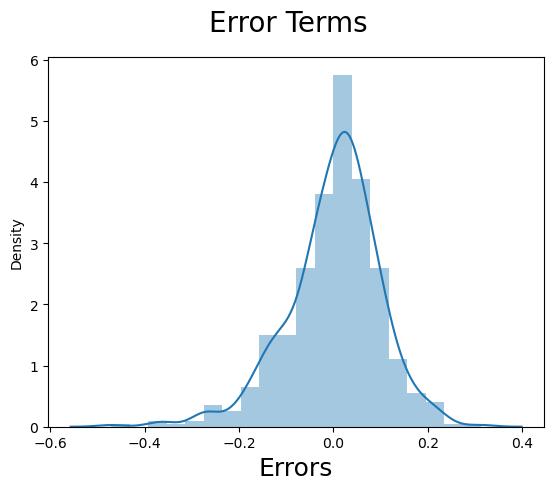

In [32]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

The residuals on the train set are normally disributed

Text(0.5, 0, 'y_train')

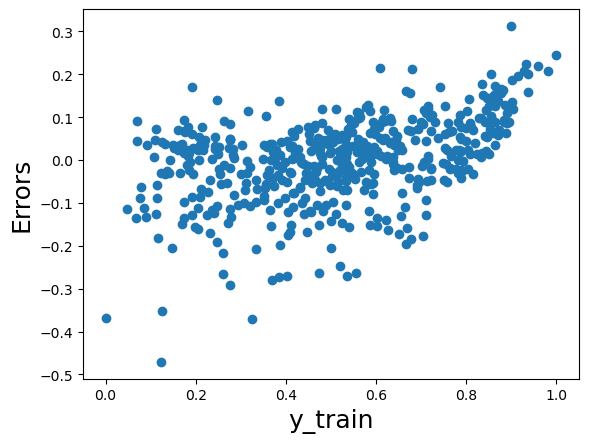

In [34]:
plt.scatter(y_train, (y_train - y_train_pred))
plt.ylabel('Errors', fontsize = 18) 
plt.xlabel('y_train', fontsize = 18) 

Now checking for the variance in the error terms, the error terms just appear to be evenly distributed noise around zero which is ideal. This way, the assumptions of linear regression are statisfied and we can move on to making inferences on the test set

### Predictions on the test set

In [ ]:
# Sclae the numerical variables of the test set using the previously fitted scaler
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [40]:
y_test = df_test.pop("cnt")
X_test = df_test
X_test = sm.add_constant(X_test)
X_test = X_test[X_train_new.columns] #Keep only those features chosen on the train set above

In [41]:
y_pred = lr.predict(X_test)

Text(0, 0.5, 'y_pred')

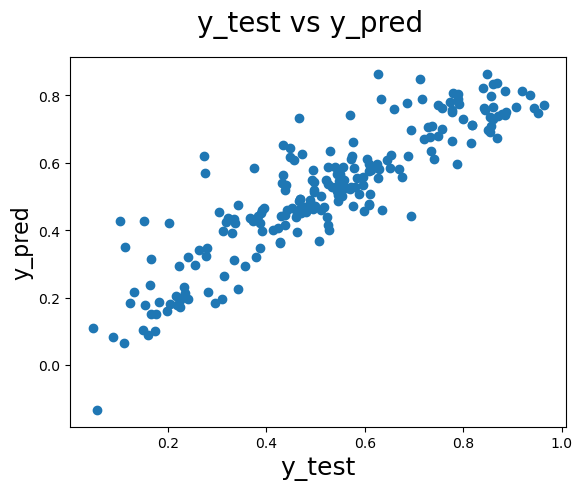

In [42]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7888115946045292

The plot shows a good agreement between the predictions and actual values on the test set. Moreover, the R-squared value on the test set is about 78.9% while it was about 80.5% on the train set. Since these 2 values are quite close, it indicates that our model is able to generalise well and has not overfit on the training set.